In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()

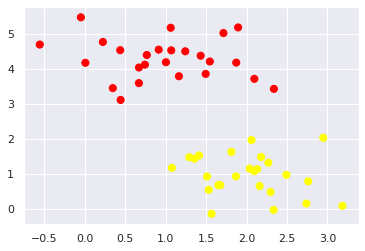

In [3]:
# from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_blobs
x, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=.6)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn');

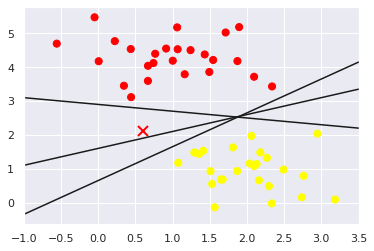

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2,
        markersize=10)

for m, b in [(1, 0.65), (.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')
plt.xlim(-1, 3.5);